In [ ]:
!pip install PySCeS
!pip install stochpy

In [ ]:
import stochpy

In [1]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]     
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation     
    smod.FillDataStochsim() # add all data to data_stochsim object

In [2]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
import matplotlib as plt
import math

plt.rcParams.update({'figure.max_open_warning': 0})
#smod = stochpy.SSA(model_file='DBDfinal.psc',dir='/Users/sebastianmoes/Documents/GitHub/iGem2020Uppsala/python_scripts/stochpy')
T_GENERATION = 3600


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [ ]:
### 2: Do long simulation for probability density function of protein copy numbers ###
N_GENERATIONS = 100
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=10)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimercaff'])
smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])

simulation with Caff concentration = 4  backgrounddimer = 0  kdeg= 0.1
donelating ....
simulation with Caff concentration = 472  backgrounddimer = 0  kdeg= 0.1
donelating .....     
simulation with Caff concentration = 4720  backgrounddimer = 0  kdeg= 0.1
donelating ..        


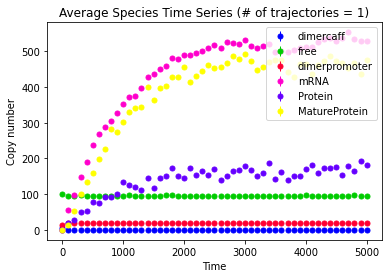

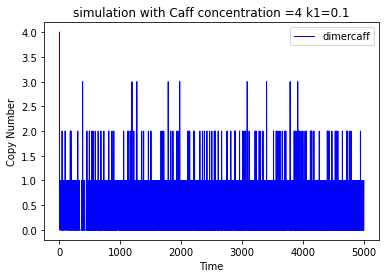

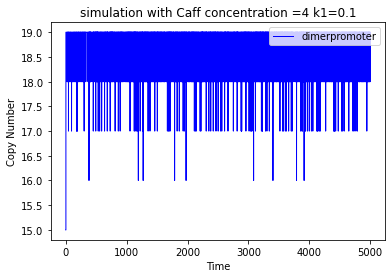

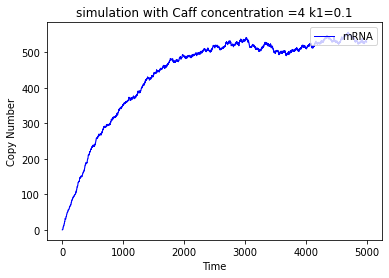

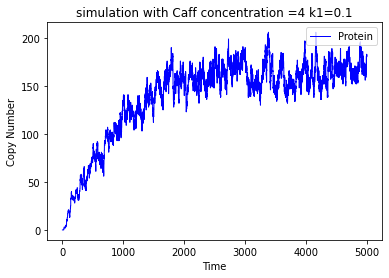

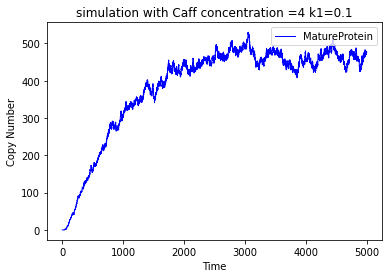

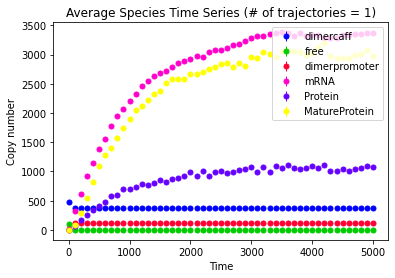

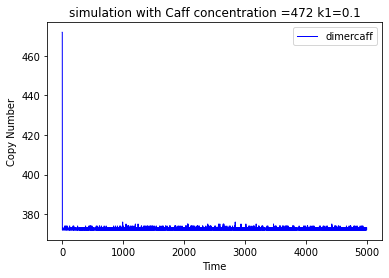

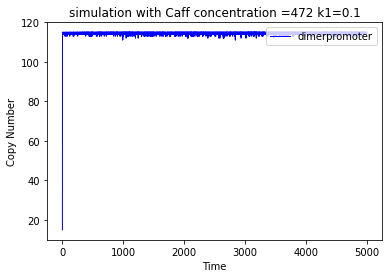

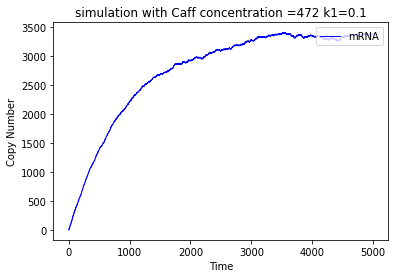

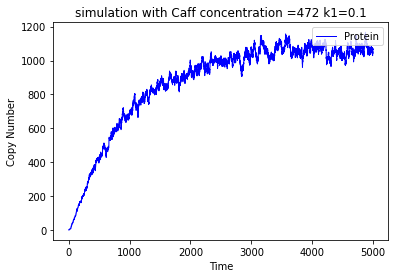

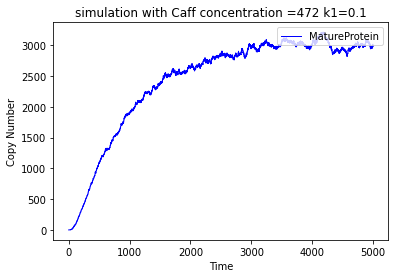

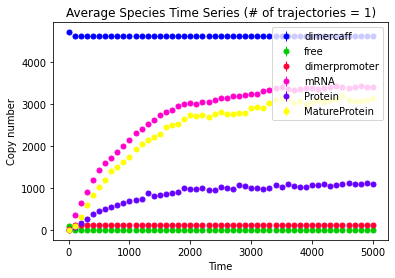

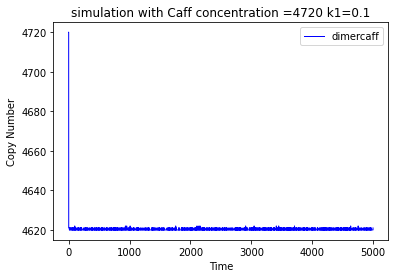

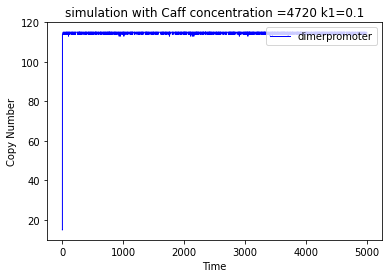

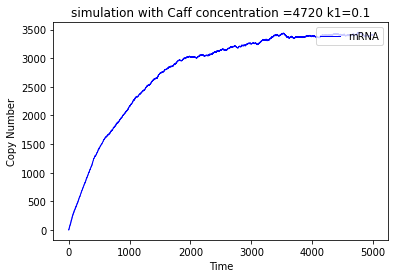

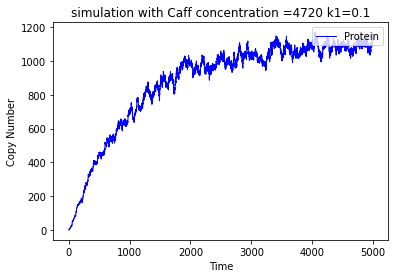

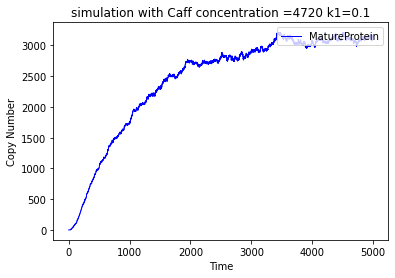

In [9]:
### 1: Do short looping simulations for a time series plot ###
#dimercaff = [0,400,4000,8000,12000,16000,20000]
dimercaff = [0,400,4000]
caff = [4,472,4720]
backgrounddimer = [0,10,50,100,500]
k1 = [0.001,0.-1,1]
k2 = [0.001,0.01,0.1]
for i in caff:
    for j in backgrounddimer:
        for k in k1:
            print('simulation with Caff concentration =',i,' backgrounddimer =',j,' kdeg=',k)
            graphtitle = str('simulation with Caff concentration ='+str(i)+' k1='+str(k))
            smod.Model("DBDfinal.psc")
            smod.ChangeInitialSpeciesCopyNumber("dimercaff",i+j)
            smod.ChangeParameter("k1",k)
            smod.DoStochSim(trajectories=1,end=5000,mode='time')
            smod.GetRegularGrid()
            smod.PlotAverageSpeciesTimeSeries()
            smod.PlotSpeciesTimeSeries(species2plot=['dimercaff'], title=graphtitle)
            smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'], title=graphtitle)
            smod.PlotSpeciesTimeSeries(species2plot=['mRNA'], title=graphtitle)
            smod.PlotSpeciesTimeSeries(species2plot=['Protein'], title=graphtitle)
            smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'], title=graphtitle)
            stochpy.plt.savefig('stochfigure_caff_'+str(i)+' bkgrnd ='+str(j)+'_k1_'+str(int(k*10000)))
            print('done')

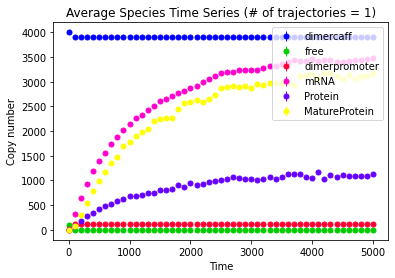

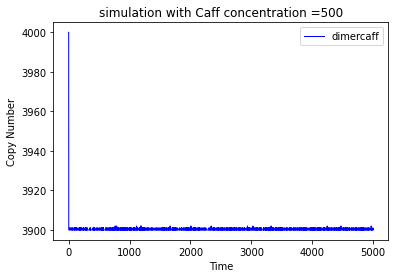

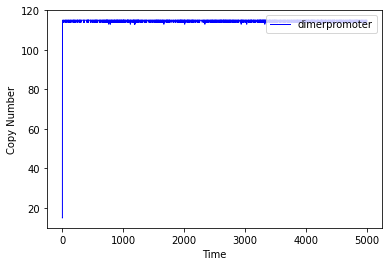

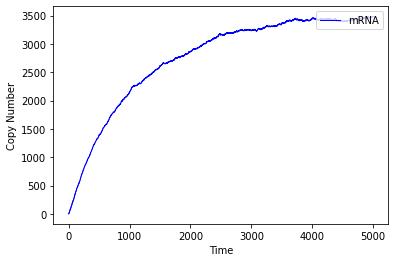

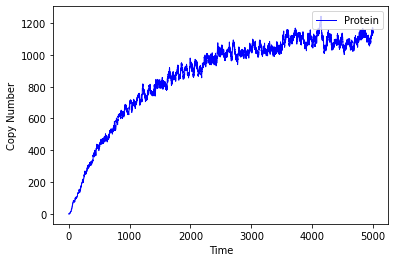

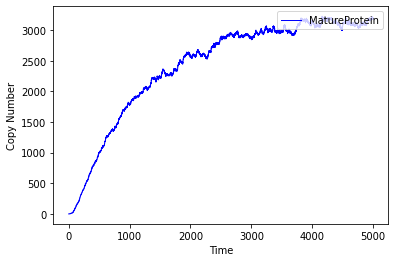

In [6]:
### Test a model 
smod.Model("DBDfinal.psc")
graphtitle = str('simulation with Caff concentration ='+str(500))
#smod.ChangeInitialSpeciesCopyNumber("dimercaff",4)
smod.ChangeParameter("k1",0.1)
smod.DoStochSim(trajectories=1,end=5000,mode='time')

smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()
smod.PlotSpeciesTimeSeries(species2plot=['dimercaff'], title=graphtitle)
smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])
#stochpy.plt.savefig("stochfigure_caff_"+str(500))

In [ ]:
pwd